### Please install the required Python modules/SDKs

In [101]:
! activate ai-azure-c1

import sys

sys.path.append("/opt/conda/envs/ai-azure-c1/lib/python3.8/site-packages")

In [102]:
from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateBatch, ImageFileCreateEntry, Region
from msrest.authentication import ApiKeyCredentials


In [103]:
PREDICTION_ENDPOINT = 'https://udacitycustomvision129-prediction.cognitiveservices.azure.com/'
prediction_key = "45f2ef9371e7452e89bc0e94c31288f7"
prediction_resource_id = "/subscriptions/3cc21bd5-a194-442e-b2f4-a406b04f8ea0/resourceGroups/udacity-course/providers/Microsoft.CognitiveServices/accounts/udacitycustomvision129"

In [104]:
prediction_credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
predictor = CustomVisionPredictionClient(PREDICTION_ENDPOINT, prediction_credentials)

In [105]:
def perform_prediction(image_file_name):
    with open(image_file_name, "rb") as image_contents:
        results = predictor.detect_image("1189cb17-2f30-44ea-b40f-df2864ef78d9", "iteration2", image_contents.read())
        # Display the results.
        for prediction in results.predictions:
            print("\t" + prediction.tag_name +
                  ": {0:.2f}%".format(prediction.probability * 100))

In [106]:
file_name = "/home/workspace/lighter_test.jpg"

In [107]:
perform_prediction(file_name)

	Lighter: 83.95%
	Lighter: 35.98%
	Lighter: 3.07%
	Lighter: 2.67%
	Lighter: 1.90%
	Lighter: 1.17%


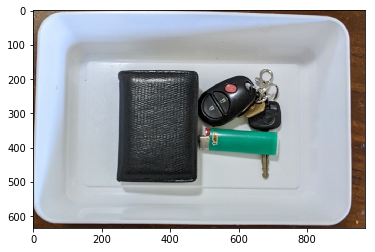

In [108]:
## Checking the Image
with open(os.path.join (local_image_path, file_name), 'rb') as img_code:
    img_view_ready = Image.open(img_code)
    plt.figure()
    plt.imshow(img_view_ready)